In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [136]:
df_initial = pd.read_csv('./data.csv',
                         encoding='latin1',
                         dtype={
                             'CustomerID': str,
                             'InvoiceID': str
                         })
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])
print('Dataframe dimensions:', df_initial.shape)

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
tab_info = tab_info.append(
    pd.DataFrame(
        df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
tab_info = tab_info.append(
    pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] *
                 100).T.rename(index={0: 'null values (%)'}))
print(tab_info)

Dataframe dimensions: (541909, 8)
                 InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type         object    object      object    int64  datetime64[ns]   
null values (nb)         0         0        1454        0               0   
null values (%)        0.0       0.0    0.268311      0.0             0.0   

                 UnitPrice CustomerID Country  
column type        float64     object  object  
null values (nb)         0     135080       0  
null values (%)        0.0  24.926694     0.0  


In [137]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [138]:
# Remove entries for customer ID NULL
df_initial.dropna(axis=0, subset=['CustomerID'], inplace=True)
print('Dataframe dimensions:', df_initial.shape)

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
tab_info = tab_info.append(
    pd.DataFrame(
        df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
tab_info = tab_info.append(
    pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] *
                 100).T.rename(index={0: 'null values (%)'}))
print(tab_info)

Dataframe dimensions: (406829, 8)
                 InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type         object    object      object    int64  datetime64[ns]   
null values (nb)         0         0           0        0               0   
null values (%)        0.0       0.0         0.0      0.0             0.0   

                 UnitPrice CustomerID Country  
column type        float64     object  object  
null values (nb)         0          0       0  
null values (%)        0.0        0.0     0.0  


In [139]:
df_initial.drop_duplicates(inplace=True)


In [141]:
country_to_index = {}
count = 0
countries = df_initial["Country"].to_numpy()
for i in range(countries.shape[0]):
    if countries[i] not in country_to_index:
        country_to_index[countries[i]] = count
        count += 1
print(count)
print(country_to_index)

37
{'United Kingdom': 0, 'France': 1, 'Australia': 2, 'Netherlands': 3, 'Germany': 4, 'Norway': 5, 'EIRE': 6, 'Switzerland': 7, 'Spain': 8, 'Poland': 9, 'Portugal': 10, 'Italy': 11, 'Belgium': 12, 'Lithuania': 13, 'Japan': 14, 'Iceland': 15, 'Channel Islands': 16, 'Denmark': 17, 'Cyprus': 18, 'Sweden': 19, 'Austria': 20, 'Israel': 21, 'Finland': 22, 'Greece': 23, 'Singapore': 24, 'Lebanon': 25, 'United Arab Emirates': 26, 'Saudi Arabia': 27, 'Czech Republic': 28, 'Canada': 29, 'Unspecified': 30, 'Brazil': 31, 'USA': 32, 'European Community': 33, 'Bahrain': 34, 'Malta': 35, 'RSA': 36}


In [142]:
df_initial = df_initial.drop("Country", 1)

/tmp/ipykernel_30502/543043970.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_initial = df_initial.drop("Country", 1)


In [143]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850


In [144]:
for i in range(countries.shape[0]):
    countries[i] = country_to_index[countries[i]]
df_initial["CountryID"] = countries
df_initial.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,CountryID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,1
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,1


In [145]:
df_phase2 = df_initial
df_phase2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,CountryID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,0
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,1


In [146]:
pd.DataFrame([{
    'products': len(df_initial['StockCode'].value_counts()),
    'transactions': len(df_initial['InvoiceNo'].value_counts()),
    'customers': len(df_initial['CustomerID'].value_counts()),
}],
             columns=['products', 'transactions', 'customers'],
             index=['quantity'])


,products,transactions,customers
quantity,3684,22190,4372


In [343]:
# Grouping Rows if they belong to same invoice no and customer id
temp = df_phase2.groupby(by=['CustomerID', 'InvoiceNo'],
                         as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(
    columns={'InvoiceDate': 'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


In [148]:
df_cleaned = df_phase2.copy(deep=True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = []
doubtfull_entry = []

for index, col in df_phase2.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df_phase2[(df_phase2['CustomerID'] == col['CustomerID'])
                        & (df_phase2['StockCode'] == col['StockCode']) &
                        (df_phase2['InvoiceDate'] < col['InvoiceDate']) &
                        (df_phase2['Quantity'] > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0):
        doubtfull_entry.append(index)

    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)

    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0, ascending=False, inplace=True)
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index)
            break


In [149]:
df_cleaned.to_csv("df_cleaned.csv")

In [ ]:
print(len(doubtfull_entry))

In [150]:
df_cleaned.drop(entry_to_remove, axis=0, inplace=True)
df_cleaned.drop(doubtfull_entry, axis=0, inplace=True)


In [151]:
print(df_cleaned.shape)

(392857, 9)


In [152]:
df_phase3 = df_cleaned

In [157]:
to_remove = []
for i, val in df_phase3.iterrows():
    if val["Quantity"] <= 0:
        to_remove.append(i)
print(len(to_remove))

0


In [156]:
df_phase3.drop(to_remove, axis=0, inplace=True)


In [ ]:
df_phase3["TotalPrice"] = df_phase3["UnitPrice"] * (
    df_phase3["Quantity"] - df_phase3["QuantityCanceled"])
df_phase3

In [342]:
temp = df_phase3.groupby(by=['CustomerID', 'InvoiceNo'],
                         as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})
basket_price = basket_price[basket_price["Basket Price"] > 0]
basket_price.head()

,CustomerID,InvoiceNo,Basket Price
1,12347,537626,711.79
2,12347,542237,475.39
3,12347,549222,636.25
4,12347,556201,382.52
5,12347,562032,584.91


In [159]:
df_phase3.to_csv("df_phase3.csv")

In [161]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
lem = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /home/vaibhav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vaibhav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/vaibhav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
root_freq = {}
stock_to_roots = {}
root_to_index = {}
count = 0


def is_noun(pos):
    if pos[:2] == 'NN':
        return True
    return False


for i, row in df_phase3.iterrows():
    desc = row["Description"]
    if pd.isnull(desc):
        continue
    desc = desc.lower()
    stock = row["StockCode"]
    tokens = nltk.word_tokenize(desc)
    nouns = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)]
    vis = {}
    temp = []
    for noun in nouns:
        noun = noun.lower()
        root = lem.lemmatize(noun)
        if root not in root_freq:
            root_freq[root] = 1
            vis[root] = 1
            temp.append(root)
            root_to_index[root] = count
            count += 1
        elif root not in vis:
            root_freq[root] += 1
            vis[root] = 1
            temp.append(root)
    stock_to_roots[stock] = temp

print(root_freq)

In [165]:
threshold = 1400
print(len(root_freq))
top_roots = {key: val for key, val in root_freq.items() if val >= threshold}
print(len(top_roots))

1498
185


In [ ]:
c = 0
pop_root_to_index = {}
for key, val in top_roots.items():
    pop_root_to_index[key] = c
    c += 1
print(pop_root_to_index)

In [167]:
list_products = df_phase3["StockCode"].unique()

In [168]:
products_np = []
mean_prices = []
count_cat = [0 for _ in range(6)]
for i, stock in enumerate(list_products):
    desc = df_phase3[df_phase3["StockCode"] == stock]["Description"].iloc[0]
    temp = [stock, desc]
    roots = stock_to_roots[stock]
    t = [0 for i in range(len(top_roots))]
    for root in roots:
        if root in top_roots:
            index = pop_root_to_index[root]
            t[index] = 1
    temp.extend(t)
    mean_price = df_phase3[df_phase3["StockCode"] == stock]["UnitPrice"].mean()
    prod_cat = 0

    if mean_price < 1:
        prod_cat = 0
    elif mean_price < 2:
        prod_cat = 1
    elif mean_price < 3:
        prod_cat = 2
    elif mean_price < 5:
        prod_cat = 3
    elif mean_price < 10:
        prod_cat = 4
    else:
        prod_cat = 5

    cat_list = [0 for _ in range(6)]
    cat_list[prod_cat] = 1
    temp.extend(cat_list)
    mean_prices.append(mean_price)
    count_cat[prod_cat] += 1
    temp = np.array(temp)
    # print(temp.shape)
    products_np.append(temp)

0.00075


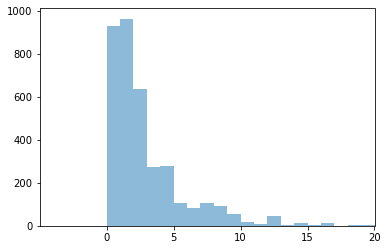

In [169]:
bins = np.arange(-100, 100, 1)  # fixed bin size
print(min(mean_prices))
plt.xlim([min(mean_prices) - 5, 20])

plt.hist(mean_prices, bins=bins, alpha=0.5)
plt.show()


In [170]:
count_cat = np.array(count_cat)
for i in range(6):
    print(count_cat[i] / np.sum(count_cat) * 100, "%")


25.34788540245566 %
26.302864938608455 %
17.32605729877217 %
15.061391541609822 %
11.950886766712141 %
4.0109140518417465 %


In [171]:
products_np = np.array(products_np)
print(products_np.shape)

(3665, 193)


In [172]:
cols = ["StockCode", "Description"]
for i in range(185):
    cols.append("root-" + str(i + 1))
for i in range(6):
    cols.append("priceRange-" + str(i + 1))
df_products = pd.DataFrame(products_np, columns=cols)
df_products.to_csv("df_products.csv")

In [2]:
df_products = pd.read_csv("df_products.csv", encoding="latin1")


In [173]:
df_inp = df_products.drop(["StockCode", "Description", df_products.columns[0]],
                          axis=1)
prod_np = df_inp.to_numpy().astype('int64')


In [281]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=7, n_init=1000)
kmeans.fit(prod_np)
clusters = kmeans.predict(prod_np)

print(pd.Series(clusters).value_counts())

1    929
3    880
4    635
5    552
2    438
6    147
0     84
dtype: int64


In [282]:
print(pd.Series(clusters).value_counts())

1    929
3    880
4    635
5    552
2    438
6    147
0     84
dtype: int64


In [283]:
print(df_phase3.shape, len(clusters))


(392732, 11) 3665


In [284]:
df_phase4 = df_products[["StockCode", "Description"]]
df_phase4["Category"] = clusters
print(df_phase4)


     StockCode                          Description  Category
0       85123A   WHITE HANGING HEART T-LIGHT HOLDER         4
1        71053                  WHITE METAL LANTERN         5
2       84406B       CREAM CUPID HEARTS COAT HANGER         5
3       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         5
4       84029E       RED WOOLLY HOTTIE WHITE HEART.         5
...        ...                                  ...       ...
3660    90214U            LETTER "U" BLING KEY RING         1
3661    90214W            LETTER "W" BLING KEY RING         1
3662    90214Z            LETTER "Z" BLING KEY RING         1
3663     90089       PINK CRYSTAL SKULL PHONE CHARM         1
3664     23843          PAPER CRAFT , LITTLE BIRDIE         4

[3665 rows x 3 columns]


/tmp/ipykernel_30502/3665360597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phase4["Category"] = clusters


In [285]:
df_phase4.to_csv("final_prod_cat.csv")

In [ ]:
stock_to_cat = {}

for i, row in df_phase4.iterrows():
    stock_to_cat[row["StockCode"]] = row["Category"]

print(stock_to_cat)

In [287]:
stock_list = df_phase3["StockCode"].to_numpy()
cat_list = []
for i in range(stock_list.shape[0]):
    cat_list.append(stock_to_cat[stock_list[i]])

df_phase3["prod_cat"] = cat_list


In [288]:
df_phase3_np = df_phase3.to_numpy()

In [ ]:
print(df_phase3)

In [289]:
df_phase5 = []
for i in range(df_phase3_np.shape[0]):
    temp = [0, 0, 0, 0, 0, 0, 0]
    cat = df_phase3_np[i][-1]
    temp[cat] = df_phase3_np[i][-2]
    res = list(df_phase3_np[i]) + temp
    df_phase5.append(np.array(res))

df_phase5_np = np.array(df_phase5)
print(df_phase5_np)


[['536365' '85123A' 'WHITE HANGING HEART T-LIGHT HOLDER' ...
  15.299999999999999 0 0]
 ['536365' '71053' 'WHITE METAL LANTERN' ... 0 20.34 0]
 ['536365' '84406B' 'CREAM CUPID HEARTS COAT HANGER' ... 0 22.0 0]
 ...
 ['581587' '23254' 'CHILDRENS CUTLERY DOLLY GIRL ' ... 0 16.6 0]
 ['581587' '23255' 'CHILDRENS CUTLERY CIRCUS PARADE' ... 0 16.6 0]
 ['581587' '22138' 'BAKING SET 9 PIECE RETROSPOT ' ... 0
  14.850000000000001 0]]


In [291]:
cols = list(df_phase3.columns)
cols.extend(["cat0", "cat1", "cat2", "cat3", "cat4", "cat5", "cat6"])
df_phase6 = pd.DataFrame(df_phase5_np, columns=cols)
print(df_phase6)

       InvoiceNo StockCode                          Description Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1         536365     71053                  WHITE METAL LANTERN        6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   
...          ...       ...                                  ...      ...   
392727    581587     22613          PACK OF 20 SPACEBOY NAPKINS       12   
392728    581587     22899         CHILDREN'S APRON DOLLY GIRL         6   
392729    581587     23254        CHILDRENS CUTLERY DOLLY GIRL         4   
392730    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE        4   
392731    581587     22138        BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate UnitPrice CustomerID CountryID QuantityCanceled  \
0      20

In [292]:
df_phase6.to_csv("df_phase6.csv")

In [293]:
df_phase6 = pd.read_csv("df_phase6.csv", encoding="latin1")


In [ ]:
invoice_to_cats = {}
for i, row in df_phase6.iterrows():
    invoice = row["InvoiceNo"]
    if invoice in invoice_to_cats:
        invoice_to_cats[invoice][3] += row["cat0"]
        invoice_to_cats[invoice][4] += row["cat1"]
        invoice_to_cats[invoice][5] += row["cat2"]
        invoice_to_cats[invoice][6] += row["cat3"]
        invoice_to_cats[invoice][7] += row["cat4"]
        invoice_to_cats[invoice][7] += row["cat5"]
        invoice_to_cats[invoice][7] += row["cat6"]
        invoice_to_cats[invoice][8] += row["TotalPrice"]
    else:
        invoice_to_cats[invoice] = list([
            row["CustomerID"], row["InvoiceNo"], row["CountryID"], row["cat0"],
            row["cat1"], row["cat2"], row["cat3"], row["cat4"],
            row["TotalPrice"]
        ])

print(invoice_to_cats)

In [ ]:
df_phase7 = []
for key, val in invoice_to_cats.items():
    if val[-1] > 0:
        df_phase7.append(val)

print(df_phase7)

In [298]:
for val in (df_phase7):
    cat_sum = 0
    maxx = -1
    for j in range(3, 7):
        cat_sum += val[j]
        maxx = max(maxx, val[j])
    if maxx > val[8]:
        print(val)
        print('nope', maxx, val[7])


In [ ]:
cust_to_invoice = {}

for i, row in enumerate(df_phase7):
    cust = row[0]
    if cust in cust_to_invoice:
        cust_to_invoice[cust][2] += row[3]
        cust_to_invoice[cust][3] += row[4]
        cust_to_invoice[cust][4] += row[5]
        cust_to_invoice[cust][5] += row[6]
        cust_to_invoice[cust][6] += row[7]
        cust_to_invoice[cust][7] += row[8]
        cust_to_invoice[cust][8] = min({cust_to_invoice[cust][8], row[8], 0})
        cust_to_invoice[cust][9] = max(cust_to_invoice[cust][9], row[8])
        cust_to_invoice[cust][10] += 1
        if cust_to_invoice[cust][8] < 0:
            cust_to_invoice[cust][8] = 0
    else:
        cust_to_invoice[cust] = list([
            row[0], row[2], row[3], row[4], row[5], row[6], row[7], row[8],
            row[8], row[8], 1
        ])

print(cust_to_invoice)

In [300]:
df_phase8 = []
for key, val in cust_to_invoice.items():
    val2 = [val[i] for i in range(len(val))]
    val2.append(val[7] / (val[-1] + 0.5))
    for i in range(2, 7):
        if val[7] != 0:
            val2[i] /= (val2[7] + 0.5)
            val2[i] *= 100
        else:
            val2[i] = 0
    df_phase8.append(val2)

print(len(df_phase8[0]))
# Original Order: Customer ID, Country ID, Cat-0, Cat-1, Cat-2, Cat-3, Cat-4, Total, Min, Max, Mean, Frequency

12


In [301]:
cols = [
    "CustomerID", "CountryID", "Category-0", "Category-1", "Category-2",
    "Category-3", "Category-4", "Total Expenditure", "Min Expenditure",
    "Max Expenditure", "No. of Invoices", "Mean Expenditure"
]
df_phase9 = pd.DataFrame(df_phase8, columns=cols)
print(df_phase9)

      CustomerID  CountryID  Category-0  Category-1  Category-2  Category-3  \
0          17850          0         0.0    0.000000   23.535976    7.267993   
1          13047          0         0.0    8.951975   24.952362   15.464587   
2          12583          1         0.0   20.003645    3.412013   20.824893   
3          13748          0         0.0    5.552569    3.098814   15.494071   
4          15100          0         0.0    0.000000    0.000000    0.000000   
...          ...        ...         ...         ...         ...         ...   
4322       13436          0         0.0   10.486853    8.612392    5.927352   
4323       15520          0         0.0   15.523256    0.000000   27.488372   
4324       13298          0         0.0    0.000000    0.000000    0.000000   
4325       14569          0         0.0    0.000000    4.366142    1.579710   
4326       12713          4         0.0   10.724928    0.000000   37.347624   

      Category-4  Total Expenditure  Min Expenditur

In [302]:
df_phase9.to_csv("df_phase9.csv")

In [303]:
df_phase9 = pd.read_csv("df_phase9.csv", encoding="latin1")
df_phase9.drop("CustomerID", axis=1, inplace=True)
df_phase9.drop("CountryID", axis=1, inplace=True)


In [304]:
df_phase9.max()

Unnamed: 0             4326.000000
Category-0               93.457944
Category-1               99.992767
Category-2               99.984120
Category-3               99.971273
Category-4               99.987052
Total Expenditure    279765.020000
Min Expenditure        6207.670000
Max Expenditure       30757.000000
No. of Invoices         205.000000
Mean Expenditure       9940.360000
dtype: float64

In [315]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10000)
kmeans.fit(df_phase9)
clusters = kmeans.predict(df_phase9)
print(pd.Series(clusters).value_counts())

0    2190
5    1878
3     224
2      29
1       4
4       2
dtype: int64


In [316]:
print(list(pd.Series(clusters).value_counts()))

[2190, 1878, 224, 29, 4, 2]


In [317]:
df_phase9.max()

Unnamed: 0             4326.000000
Category-0               93.457944
Category-1               99.992767
Category-2               99.984120
Category-3               99.971273
Category-4               99.987052
Total Expenditure    279765.020000
Min Expenditure        6207.670000
Max Expenditure       30757.000000
No. of Invoices         205.000000
Mean Expenditure       9940.360000
dtype: float64

In [318]:
df_phase9.drop(df_phase9.columns[0], axis=1, inplace=True)


In [319]:
k = 6
centers = [[0 for i in range(df_phase9.shape[1])] for j in range(k)]

count = [0 for _ in range(k)]
for i, row in df_phase9.iterrows():
    cur = clusters[i]
    count[cur] += 1
    for j in range(df_phase9.shape[1]):
        centers[cur][j] += row[j]
centers = np.array(centers)
for i in range(k):
    centers[i] /= count[i]

print(centers)

[[2.89763173e+00 1.49827460e+01 1.38690101e+01 2.30418896e+01
  4.13741165e+01 5.75699065e+02 1.80426708e+02 3.77848558e+02
  1.92009132e+00 2.33963481e+02]
 [2.30201075e+00 9.63152853e+00 1.25742034e+01 1.84628904e+01
  5.35445711e+01 1.42000315e+05 0.00000000e+00 1.80259875e+04
  7.97500000e+01 3.31131261e+03]
 [1.67792920e+00 1.10786227e+01 1.24696226e+01 2.05117039e+01
  4.98275825e+01 4.32741983e+04 0.00000000e+00 6.80215379e+03
  4.50689655e+01 1.71818151e+03]
 [1.80878213e+00 1.08389101e+01 1.55313871e+01 2.06613763e+01
  4.74259652e+01 8.74500848e+03 4.94708929e+01 1.72664777e+03
  1.62767857e+01 7.58449850e+02]
 [1.44526173e+00 6.69138749e+00 3.36556100e+01 1.71379543e+01
  3.79501196e+01 2.69711160e+05 0.00000000e+00 2.12419600e+04
  6.65000000e+01 4.04909150e+03]
 [3.07121795e+00 1.33356055e+01 1.54151210e+01 2.18700887e+01
  4.25447294e+01 1.49822688e+03 6.39813046e+01 5.21135256e+02
  4.67944622e+00 2.95189313e+02]]


In [263]:
print(centers[3][1])

15.232961590085395


In [264]:
print(np.array(centers[:, 0]))


[1.32203556e+02 3.68526257e+03 5.98540146e+00 2.86428571e+02
 1.44106133e+05 4.69633333e+03]


In [277]:
# temp[4]=0

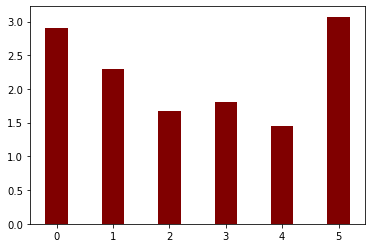

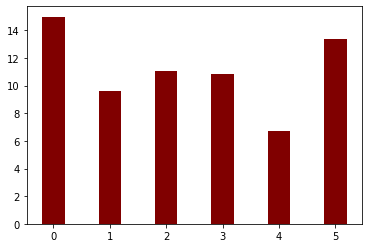

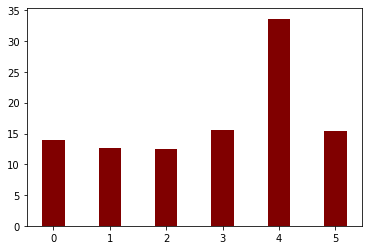

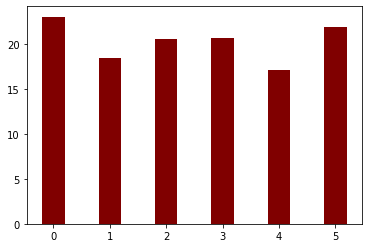

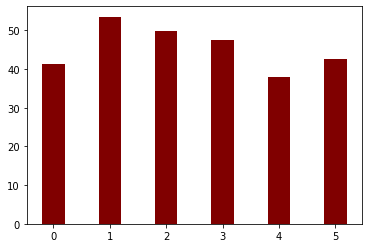

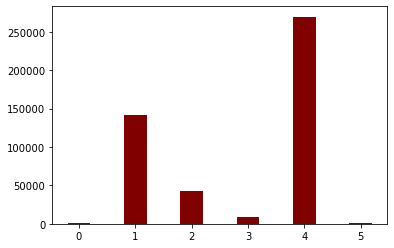

In [320]:
for j in range(6):
    temp = centers[:, j]
    plt.bar([i for i in range(6)], temp, color='maroon', width=0.4)
    plt.show()


In [325]:
cust_to_clust = {}
for i,val in enumerate(df_phase8):
    cust_to_clust[val[0]] = clusters[i]

In [ ]:
cust_to_clust

In [327]:
df_phase3.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'CountryID', 'QuantityCanceled',
       'TotalPrice', 'prod_cat'],
      dtype='object')

In [332]:
cust_cat = []
for i,val in df_phase3.iterrows():
    if int(val[6]) in cust_to_clust:
        cust_cat.append(cust_to_clust[int(val[6])])
    else:
        cust_cat.append(-1)
df_phase3["customer cluster"] = cust_cat

In [338]:
word_cloud_dicts = [dict() for _ in range(6)]
for i,row in df_phase3.iterrows():
    clust = row["customer cluster"]
    for j,root in enumerate(stock_to_roots[row["StockCode"]]):
        if root in word_cloud_dicts[clust]:
            word_cloud_dicts[clust][root]+=1
        else:
            word_cloud_dicts[clust][root]=1

In [340]:
from wordcloud import WordCloud, STOPWORDS

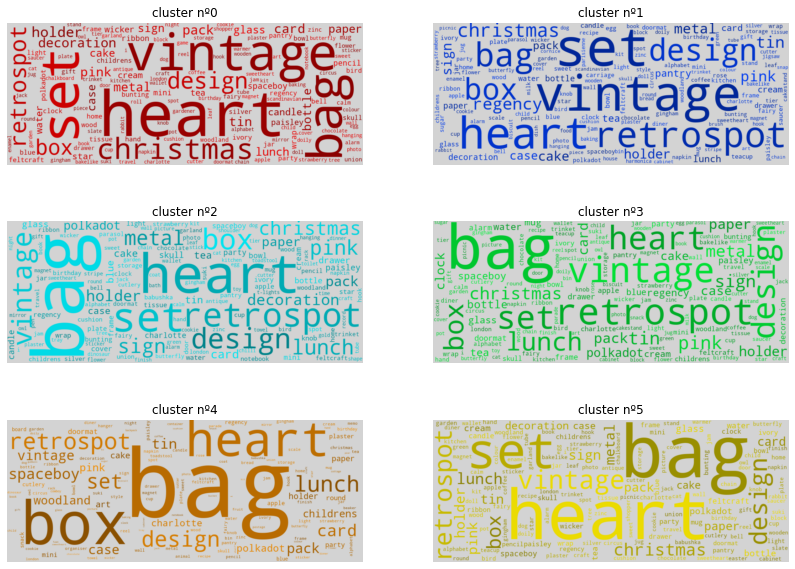

In [341]:
n_clusters = 6

#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    tone = color[i] 
    liste = []
    for key, value in word_cloud_dicts[i].items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)            

